In [9]:
#We chose regression in this task. Classification is best used for predicting where the "Stock" is heading, lower or higher. Where on the other side, regression is used for predicting the specific number. 
#We need to predict the price of Tesla on a specific date, thats why regression is the best option for us. 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



url="TSLA.csv"
df = pd.read_csv(url, sep=',')

df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df = df[['Close']]
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


Text(0, 0.5, 'close price')

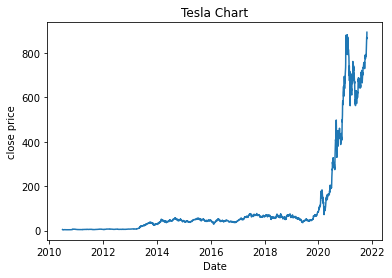

In [13]:
plt.figure()
plt.plot(df['Close'])
plt.title('Tesla Chart')
plt.xlabel('Date')
plt.ylabel('close price')